## Import Libraries

In [135]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_validate

import shap

import warnings
warnings.filterwarnings('ignore')

In [67]:
pip list

Package                       Version
----------------------------- -----------
alabaster                     0.7.12
alembic                       1.10.3
altair                        4.2.2
anaconda-client               1.11.1
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weak

In [68]:
#pip install streamlit==1.10.0

In [69]:
#pip install scikit-learn==1.0.2

In [70]:
# pip install seaborn

In [71]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print(" r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

In [72]:
df=pd.read_csv("final_scout_not_dummy.csv")
pd.set_option('display.max_columns',  None)
pd.options.display.float_format = '{:,.2f}'.format

In [73]:
df.head(1)
#df.sample()
#df.tail(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,"56,013.00",Used,Diesel,7.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.00,2.00,66.00,1,Metallic,Cloth,Automatic,"1,422.00","1,220.00",front,3.80


In [74]:
df.shape

(15915, 23)

In [75]:
df.isnull().sum().any()

False

In [76]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'Type', 'Fuel',
       'Gears', 'Comfort_Convenience', 'Entertainment_Media', 'Extras',
       'Safety_Security', 'age', 'Previous_Owners', 'hp_kW', 'Inspection_new',
       'Paint_Type', 'Upholstery_type', 'Gearing_Type', 'Displacement_cc',
       'Weight_kg', 'Drive_chain', 'cons_comb'],
      dtype='object')

In [77]:
numerical= df.select_dtypes('number').columns
categorical = df.select_dtypes('object').columns

print(f'Numerical Columns:  {df[numerical].columns}')
print('\n')
print(f'Categorical Columns: {df[categorical].columns}')

Numerical Columns:  Index(['price', 'km', 'Gears', 'age', 'Previous_Owners', 'hp_kW',
       'Inspection_new', 'Displacement_cc', 'Weight_kg', 'cons_comb'],
      dtype='object')


Categorical Columns: Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Comfort_Convenience',
       'Entertainment_Media', 'Extras', 'Safety_Security', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [79]:
df.describe()

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb
count,"15,915.00","15,915.00","15,915.00","15,915.00","15,915.00","15,915.00","15,915.00","15,915.00","15,915.00","15,915.00"
mean,"18,024.38","32,090.00",5.94,1.39,1.04,88.50,0.25,"1,428.66","1,337.70",4.83
std,"7,381.68","36,977.21",0.70,1.12,0.34,26.67,0.43,275.80,199.68,0.87
min,"4,950.00",0.00,5.00,0.00,0.00,40.00,0.00,890.00,840.00,3.00
25%,"12,850.00","1,920.50",5.00,0.00,1.00,66.00,0.00,"1,229.00","1,165.00",4.10
50%,"16,900.00","20,413.00",6.00,1.00,1.00,85.00,0.00,"1,461.00","1,295.00",4.80
75%,"21,900.00","46,900.00",6.00,2.00,1.00,103.00,0.00,"1,598.00","1,472.00",5.40
max,"74,600.00","317,000.00",8.00,3.00,4.00,294.00,1.00,"2,967.00","2,471.00",9.10


In [80]:
df.describe(include="object").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [81]:
print("Number of Uniques:\n", df.select_dtypes('object').nunique(),'\n', sep='')

Number of Uniques:
make_model                9
body_type                 8
vat                       2
Type                      5
Fuel                      4
Comfort_Convenience    6196
Entertainment_Media     346
Extras                  659
Safety_Security        4442
Paint_Type                3
Upholstery_type           2
Gearing_Type              3
Drive_chain               3
dtype: int64



In [82]:
print("Number of Uniques:\n", df.select_dtypes('number').nunique(), '\n', sep='')

Number of Uniques:
price              2952
km                 6691
Gears                 4
age                   4
Previous_Owners       5
hp_kW                77
Inspection_new        2
Displacement_cc      68
Weight_kg           432
cons_comb            62
dtype: int64



In [83]:
df.Type.value_counts()

Type
Used              11095
New                1649
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: count, dtype: int64

In [84]:
df.Fuel.value_counts()

Fuel
Benzine     8548
Diesel      7298
LPG/CNG       64
Electric       5
Name: count, dtype: int64

In [85]:
df.Paint_Type.value_counts()

Paint_Type
Metallic       15246
Uni/basic        637
Perl effect       32
Name: count, dtype: int64

In [86]:
df.Drive_chain.value_counts()

Drive_chain
front    15707
4WD        204
rear         4
Name: count, dtype: int64

In [87]:
df.body_type.unique()

array(['Sedans', 'Station wagon', 'Compact', 'Coupe', 'Van', 'Off-Road',
       'Convertible', 'Transporter'], dtype=object)

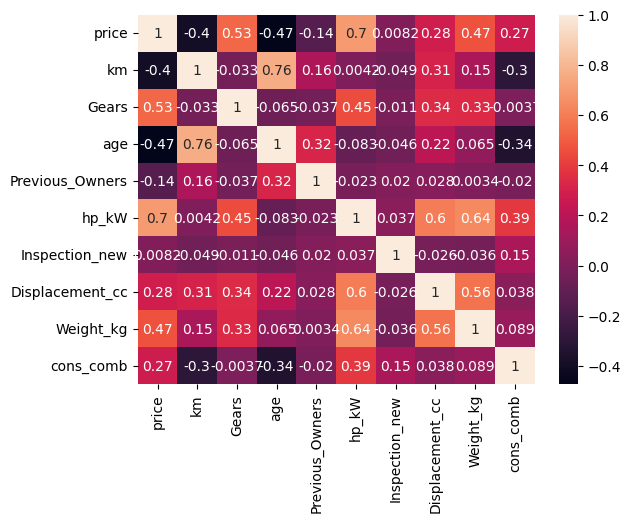

In [88]:
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [232]:
pd.DataFrame(df.select_dtypes('number').agg(['min', 'max']))

,price,km,Gears,age,Previous_Owners,hp_kW,Inspection_new,Displacement_cc,Weight_kg,cons_comb,num_of_extras
min,4950,0.00,5.00,0.00,0.00,40.00,0,890.00,840.00,3.00,1
max,74600,"317,000.00",8.00,3.00,4.00,294.00,1,"2,967.00","2,471.00",9.10,10


In [90]:
df.age.unique()

array([3., 2., 1., 0.])

In [91]:
df.Gearing_Type.unique()

array(['Automatic', 'Manual', 'Semi-automatic'], dtype=object)

In [92]:
df.make_model.unique()

array(['Audi A1', 'Audi A2', 'Audi A3', 'Opel Astra', 'Opel Corsa',
       'Opel Insignia', 'Renault Clio', 'Renault Duster',
       'Renault Espace'], dtype=object)

In [233]:
df.Gears.unique()

array([7., 6., 5., 8.])

In [93]:
df.make_model.value_counts()

make_model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [94]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,"26,166.00",Employee's car,Diesel,6.00,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.00,1.00,85.00,0,Metallic,Cloth,Manual,"1,598.00","1,135.00",front,4.90


In [95]:
df.drop(index=[2614], inplace =True)

In [96]:
df.reset_index(drop=True, inplace=True)

In [97]:
df.make_model.unique()

array(['Audi A1', 'Audi A3', 'Opel Astra', 'Opel Corsa', 'Opel Insignia',
       'Renault Clio', 'Renault Duster', 'Renault Espace'], dtype=object)

In [98]:
df.Inspection_new.value_counts()

Inspection_new
0    11982
1     3932
Name: count, dtype: int64

In [99]:
df.Previous_Owners.value_counts()

Previous_Owners
1.00    14157
2.00     1172
0.00      554
3.00       29
4.00        2
Name: count, dtype: int64

## Feature Engineering

In [100]:
df.sample(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2458,Audi A1,Sedans,22700,VAT deductible,10.00,Pre-registered,Benzine,6.00,"Air conditioning,Electrical side mirrors,Leath...","Bluetooth,Radio,USB",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",0.00,1.00,85.00,0,Metallic,Cloth,Manual,999.00,"1,230.00",front,4.80


### Comfort Convenience

In [101]:
# GPT-4 categorization
standard = ['Air conditioning', 'Armrest', 'Cruise control', 'Electrical side mirrors', 'Fold flat passenger seat', 'Multi-function steering wheel', 'Power windows', 'Start-stop system', 'Tinted windows', 'Wind deflector', 'Hill Holder', 'Leather steering wheel', 'Light sensor', '2 zones']
premium = ['Automatic climate control', '3 zones', 'Navigation system', 'Seat heating', 'Split rear seats', 'Sunroof', 'Air suspension', 'Auxiliary heating', 'Electrically adjustable seats', 'Heads-up display', 'Heated steering wheel', 'Keyless central door lock', 'Lumbar support', 'Panorama roof', 'Parking assist system camera', 'Parking assist system sensors front', 'Parking assist system sensors rear', 'Rain sensor', 'Electric tailgate', '360° camera', 'Park Distance Control', 'Sliding door right', 'Sliding door left']
premium_plus = ['Electrically heated windshield', 'Parking assist system self-steering', 'Seat ventilation', 'Massage seats', 'Electric backseat adjustment', '4 zones', 'Leather seats']



In [102]:
from functools import reduce


def is_premium_plus(m):
    boollist = list(map(lambda x: x in m, premium_plus))
    return reduce(lambda x,y: x or y, boollist)

def is_premium(m):
    boollist = list(map(lambda x: x in m, premium))
    return reduce(lambda x,y: x or y, boollist)

def package_type_cc(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_plus(f): 
        return 'premium_plus'
    elif is_premium(f):
        return 'premium'
    else:
        return 'standard'
df['cc'] = df.Comfort_Convenience.apply(package_type_cc)

In [103]:
df.cc.value_counts()

cc
premium         11525
standard         2198
premium_plus     2191
Name: count, dtype: int64

### Safety Security

In [104]:
# Bing categorization
ss_standard2 = ['ABS', 'Central door lock', 'Driver-side airbag', 'Electronic stability control', 'Traction control', 'Isofix', 'Fog lights', 'Immobilizer', 'Passenger-side airbag', 'Power steering', 'Side airbag', 'Speed limit control system', 'Emergency brake assistant', 'Alarm system', 'Central door lock with remote control', 'Tire pressure monitoring system', 'Daytime running lights']
ss_premium2 = ['Xenon headlights', 'Bi-Xenon headlights', 'Head airbag', 'LED Daytime Running Lights', 'LED Headlights', 'Lane departure warning system', 'Traffic sign recognition', 'Full-LED headlights', 'Distance warning system', 'Driver drowsiness detection', 'Emergency system', 'Rear airbag', 'Adaptive Cruise Control', 'Blind spot monitor']
ss_premium_plus2 = ['Glare-free high beam headlights', 'Adaptive headlights', 'Laser headlights', 'Night view assist']

In [105]:
from functools import reduce

def is_premium_plus_ss(m):
    boollist = list(map(lambda x: x in m, ss_premium_plus2))
    return reduce(lambda x,y: x or y, boollist)

def is_premium_ss(m):
    boollist = list(map(lambda x: x in m, ss_premium2))
    return reduce(lambda x,y: x or y, boollist)

def package_type_ss(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_plus_ss(f): 
        return 'Safety Security Premium Plus'
    elif is_premium_ss(f):
        return 'Safety Security Premium'
    else:
        return 'Safety Security Standard'
df['ss'] = df.Safety_Security.apply(package_type_ss)

In [106]:
df.ss.value_counts()

ss
Safety Security Premium         8478
Safety Security Standard        5253
Safety Security Premium Plus    2183
Name: count, dtype: int64

### Entertainment Media

In [107]:
# Bing categorization
em_standard = ['USB', 'Bluetooth', 'CD player', 'MP3', 'On-board computer', 'Radio', 'Digital cockpit', 'Hands-free equipment', 'Sound system', 'Digital radio']
em_premium = ['Android Auto', 'Apple CarPlay', 'Induction charging for smartphones', 'Integrated music streaming', 'WLAN / WiFi hotspot', 'Television']

In [108]:
from functools import reduce

def is_premium_em(m):
    boollist = list(map(lambda x: x in m, em_premium))
    return reduce(lambda x,y: x or y, boollist)

def package_type_em(f):
    if pd.isna(f):
        return np.nan
    elif is_premium_em(f):
        return 'Entertainment Media Premium'
    else:
        return 'Entertainment Media Standard'
df['em'] = df.Entertainment_Media.apply(package_type_em)

### Extras

In [109]:
df.Extras.value_counts()

Extras
Alloy wheels                                                                                               5784
Alloy wheels,Touch screen                                                                                   697
Roof rack                                                                                                   595
Alloy wheels,Voice Control                                                                                  582
Alloy wheels,Touch screen,Voice Control                                                                     544
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                             

In [110]:
df["num_of_extras"] = df["Extras"].apply(lambda x: x.count(",")).add(1)

In [111]:
df.drop(columns=['Comfort_Convenience','Entertainment_Media','Extras','Safety_Security'],inplace=True)

In [112]:
df.sample(1)

,make_model,body_type,price,vat,km,Type,Fuel,Gears,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb,cc,ss,em,num_of_extras
9960,Opel Corsa,Compact,15990,VAT deductible,"7,000.00",Used,Benzine,6.00,0.00,1.00,66.00,1,Metallic,Cloth,Automatic,"1,398.00","1,163.00",front,6.30,premium_plus,Safety Security Standard,Entertainment Media Standard,1


## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [113]:
X= df.drop(columns="price")
y= df.price

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
X_train.shape, X_test.shape

((12731, 22), (3183, 22))

## Implement Catboost

In [116]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
                        "mae" : mean_absolute_error(y_train, y_train_pred),
                        "mse" : mean_squared_error(y_train, y_train_pred),
                        "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
              "test": {"R2" : r2_score(y_test, y_pred),
                       "mae" : mean_absolute_error(y_test, y_pred),
                       "mse" : mean_squared_error(y_test, y_pred),
                       "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}
    
    return pd.DataFrame(scores)

# train ve test setinin metriclerini karşılaştırabilmek için fonksiyonumuzu tanımlıyoruz.

In [117]:
cat_features = df.select_dtypes('object').columns.tolist()
cat_features.append('Inspection_new')

In [118]:
cat_features

['make_model',
 'body_type',
 'vat',
 'Type',
 'Fuel',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain',
 'cc',
 'ss',
 'em',
 'Inspection_new']

In [119]:
from catboost import CatBoostRegressor

cat_model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)
cat_model.fit(X_train, y_train)

# linear modelimizi kurup train datası üzerinde eğitiyoruz.

0:	learn: 6842.2976363	total: 15ms	remaining: 1.48s
1:	learn: 6362.2979897	total: 26.8ms	remaining: 1.31s
2:	learn: 5924.1109442	total: 35.4ms	remaining: 1.15s
3:	learn: 5555.8305562	total: 46.9ms	remaining: 1.13s
4:	learn: 5245.1925563	total: 56.6ms	remaining: 1.07s
5:	learn: 4951.4540843	total: 63.3ms	remaining: 992ms
6:	learn: 4681.3345280	total: 73.2ms	remaining: 972ms
7:	learn: 4452.1711053	total: 82ms	remaining: 943ms
8:	learn: 4234.9617917	total: 90.3ms	remaining: 913ms
9:	learn: 4042.8155629	total: 96.1ms	remaining: 865ms
10:	learn: 3879.6277395	total: 104ms	remaining: 844ms
11:	learn: 3733.9217410	total: 112ms	remaining: 819ms
12:	learn: 3613.4084919	total: 119ms	remaining: 794ms
13:	learn: 3452.8608078	total: 125ms	remaining: 768ms
14:	learn: 3326.4497569	total: 132ms	remaining: 746ms
15:	learn: 3207.2263927	total: 140ms	remaining: 735ms
16:	learn: 3105.3056091	total: 146ms	remaining: 715ms
17:	learn: 2999.8161293	total: 154ms	remaining: 704ms
18:	learn: 2928.6645453	total: 1

In [120]:
train_val(cat_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.94,0.94
mae,"1,221.66","1,247.65"
mse,"3,276,485.89","3,527,597.91"
rmse,"1,810.11","1,878.19"


In [121]:
1878/df.price.mean()

# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre modelimiz ortalama %10 hata yapıyor.

0.10419590373339742

### Cross Validate

In [124]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'], 
                        cv =10,
                        return_train_score=True)

# daha önceki derslerimizde öğrendiğimiz gibi overfiting kontrolünü cross validaition üzerinden aldığımız train ve 
# validation scorlarını karşılaştırarak yapıyoruz.

0:	learn: 6812.4756006	total: 19.9ms	remaining: 1.97s
1:	learn: 6351.9007437	total: 42.4ms	remaining: 2.08s
2:	learn: 5929.6619387	total: 63.1ms	remaining: 2.04s
3:	learn: 5557.6546029	total: 81.7ms	remaining: 1.96s
4:	learn: 5229.6998642	total: 105ms	remaining: 2s
5:	learn: 4942.4992386	total: 127ms	remaining: 1.99s
6:	learn: 4694.6821760	total: 146ms	remaining: 1.94s
7:	learn: 4458.7889556	total: 162ms	remaining: 1.86s
8:	learn: 4248.9233474	total: 186ms	remaining: 1.88s
9:	learn: 4064.2831978	total: 207ms	remaining: 1.86s
10:	learn: 3902.1288506	total: 230ms	remaining: 1.86s
11:	learn: 3705.1405755	total: 259ms	remaining: 1.9s
12:	learn: 3520.2463142	total: 283ms	remaining: 1.9s
13:	learn: 3373.8926539	total: 306ms	remaining: 1.88s
14:	learn: 3234.1836218	total: 328ms	remaining: 1.86s
15:	learn: 3109.6945045	total: 347ms	remaining: 1.82s
16:	learn: 2999.9968580	total: 368ms	remaining: 1.79s
17:	learn: 2908.6286641	total: 387ms	remaining: 1.76s
18:	learn: 2823.2364939	total: 414ms	re

In [125]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                      0.93
train_r2                                     0.94
test_neg_mean_absolute_error            -1,251.83
train_neg_mean_absolute_error           -1,203.03
test_neg_mean_squared_error         -3,653,876.67
train_neg_mean_squared_error        -3,208,345.72
test_neg_root_mean_squared_error        -1,907.12
train_neg_root_mean_squared_error       -1,791.09
dtype: float64

### Adjusted R2 Score

In [126]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

# datamızda çok fazla featura var fakat yeteri kadar satır yoksa bu durum modelimizin R2_scorunda yalancı bir iyileştirme 
# yapar. Özellikle bu tür datalarda veya datamıza çok fazla yeni feature (dummies feature gibi) ilave olduysa mutlaka 
# adjusted R2_score ile gerçek R2_score tespit etmemiz gerekiyor.

# Adjusted R2_score satır ve feature sayısı arasında ki trade off'u kontrol ederek bize bir skore döndürür. Eğer sayılar 
# arasında büyük bir dengesizlik varsa adjusted_R2_scorunda ciddi düşüşler olacaktır. Adjusted R2 Score için yukardaki
# fonksiyonu tanımlıyoruz.

In [127]:
y_pred = cat_model.predict(X_test)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [128]:
adj_r2(y_test, y_pred, X)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.935530021809943

### Prediction Error with Outliers

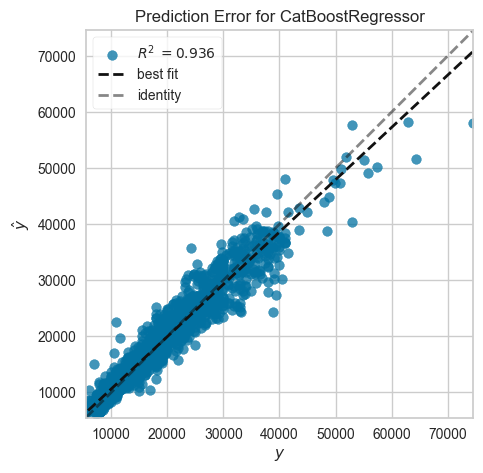

In [129]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.contrib.wrapper import wrap

visualizer = RadViz(size=(500, 1000))
catboost_model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)
model = wrap(cat_model)
visualizer = PredictionError(model)
#visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# prediciton error görseli ile modelimizin yaptığı tahminlerin ne kadar iyi olup olmadığını görebiliyoruz. Aşağıdaki
# görsele baktığımızda 70 bin EURO ve üzerindeki fiyatlı arabaların best fit linemızı aşağıya doğru çektiğini görebiliyoruz
# Eğer ben datadan scorlarımı bozduğunu gördüğüm çok düşük fiyatlı arabalar ile 70 bin EURO ve üzerindeki arabaları 
# veya modeller bazında tespit ettiğim outlier fiyatlı arabaları datamdan drop edip bu data üzerinden yeniden modeli 
# eğittiğimde daha iyi scorlar alabilirim.

# Biz bu notebookumuzda çok düşük fiyatlı arabalar ile 70.000 EURO üzerindeki arabaları drop ederek devam edeceğiz.

### Feature importance

Text(0.5, 1.0, 'Feature Importance')

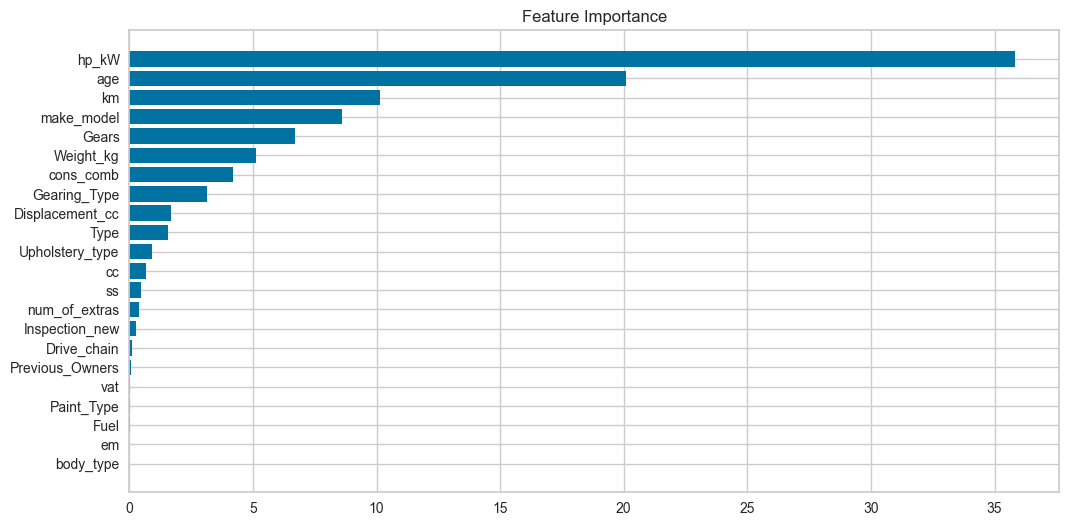

In [132]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Text(0.5, 1.0, 'Permutation Importance')

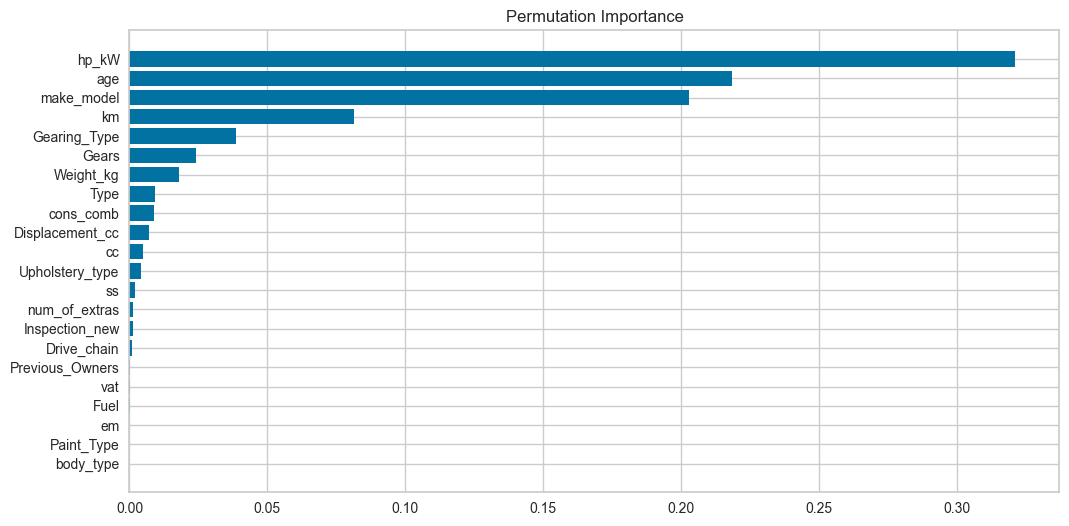

In [134]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')


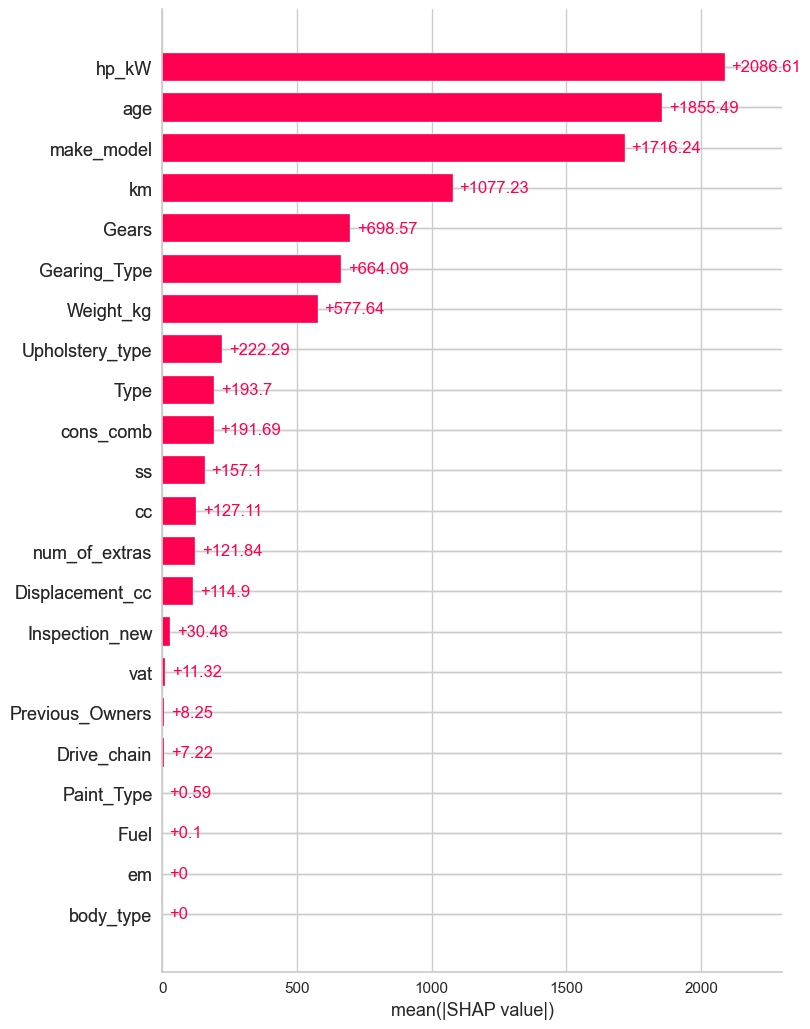

In [136]:
# https://www.rasgoml.com/feature-engineering-tutorials/how-to-generate-feature-importance-plots-using-catboost
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_test)
shap.plots.bar(shap_values, max_display=X_test.shape[0])

In [278]:
new_list= ["hp_kW", "age", 'make_model', "km", "Gearing_Type"]

In [ ]:
# Another way
from catboost import Pool
# Get the feature importances
feature_importances = cat_model.get_feature_importance(Pool(X_train,y_train, cat_features=cat_features))

# Create a dataframe of feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the features by importance
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Create a bar plot of feature importances
sns.barplot(x='importance', y='feature', data=feature_importances_df)

In [280]:
X=df[new_list]
y=df['price']

In [281]:
X.sample(5)

,hp_kW,age,make_model,km,Gearing_Type
10931,125.00,3.00,Opel Insignia,"74,893.00",Manual
6847,81.00,2.00,Opel Astra,"23,472.00",Manual
8415,66.00,1.00,Opel Corsa,"11,526.00",Automatic
4078,85.00,1.00,Audi A3,"22,000.00",Manual
11121,100.00,3.00,Opel Insignia,"118,000.00",Manual


In [282]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [283]:
cat_features = X_train.select_dtypes("object").columns.tolist()
cat_features

['make_model', 'Gearing_Type']

In [284]:
X_train.iloc[1]

hp_kW                81.00
age                   3.00
make_model      Opel Astra
km              139,000.00
Gearing_Type        Manual
Name: 6375, dtype: object

## Remodel based on Feature importance

In [285]:
from catboost import CatBoostRegressor

cat_model2 = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)
cat_model2.fit(X_train, y_train)

# linear modelimizi kurup train datası üzerinde eğitiyoruz.

0:	learn: 6929.7992648	total: 4.77ms	remaining: 472ms
1:	learn: 6452.9902857	total: 10.1ms	remaining: 496ms
2:	learn: 6058.5814106	total: 15ms	remaining: 486ms
3:	learn: 5695.2670258	total: 19.6ms	remaining: 470ms
4:	learn: 5380.6514877	total: 23.6ms	remaining: 448ms
5:	learn: 5088.9830701	total: 30.6ms	remaining: 479ms
6:	learn: 4861.7043547	total: 34.8ms	remaining: 463ms
7:	learn: 4668.7040400	total: 40.5ms	remaining: 465ms
8:	learn: 4384.8631771	total: 45.5ms	remaining: 460ms
9:	learn: 4130.8454006	total: 52.3ms	remaining: 471ms
10:	learn: 3913.4024708	total: 60.3ms	remaining: 488ms
11:	learn: 3736.3331639	total: 67.2ms	remaining: 493ms
12:	learn: 3559.4812552	total: 72.1ms	remaining: 482ms
13:	learn: 3411.2063854	total: 75.8ms	remaining: 466ms
14:	learn: 3261.3975250	total: 80.1ms	remaining: 454ms
15:	learn: 3133.2771974	total: 83.6ms	remaining: 439ms
16:	learn: 3024.0135078	total: 88.9ms	remaining: 434ms
17:	learn: 2924.5310229	total: 92.3ms	remaining: 421ms
18:	learn: 2844.844119

In [302]:
train_val(cat_model2, X_train, y_train, X_test, y_test)

,train,test
R2,0.93,0.92
mae,"1,264.35","1,275.92"
mse,"3,947,677.76","3,904,797.82"
rmse,"1,986.88","1,976.06"


In [287]:
1976/df.price.mean()

# Müşteriye vereceğimiz test seti (hold out set) skorundan aldığımız rmse skoruna göre modelimiz ortalama %10 hata yapıyor.

0.10963317666517215

### Cross Validate

In [288]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, loss_function='RMSE', cat_features= cat_features)

scores = cross_validate(model, 
                        X_train, 
                        y_train, 
                        scoring=['r2', 
                                'neg_mean_absolute_error',
                                'neg_mean_squared_error',
                                'neg_root_mean_squared_error'], 
                        cv =10,
                        return_train_score=True)

# daha önceki derslerimizde öğrendiğimiz gibi overfiting kontrolünü cross validaition üzerinden aldığımız train ve 
# validation scorlarını karşılaştırarak yapıyoruz.

0:	learn: 6939.7406801	total: 4.5ms	remaining: 445ms
1:	learn: 6480.4557796	total: 10.6ms	remaining: 520ms
2:	learn: 6054.7257875	total: 15.4ms	remaining: 499ms
3:	learn: 5693.2307646	total: 19.3ms	remaining: 463ms
4:	learn: 5384.7062051	total: 22.9ms	remaining: 435ms
5:	learn: 5106.3656301	total: 27.9ms	remaining: 438ms
6:	learn: 4875.8747541	total: 34.6ms	remaining: 459ms
7:	learn: 4662.7287745	total: 43.7ms	remaining: 502ms
8:	learn: 4383.1056558	total: 47.3ms	remaining: 479ms
9:	learn: 4133.6205473	total: 52.8ms	remaining: 475ms
10:	learn: 3914.3759401	total: 61.7ms	remaining: 500ms
11:	learn: 3725.6423878	total: 67.8ms	remaining: 497ms
12:	learn: 3562.1882610	total: 74.8ms	remaining: 500ms
13:	learn: 3420.9407723	total: 79.3ms	remaining: 487ms
14:	learn: 3300.5095228	total: 88.7ms	remaining: 503ms
15:	learn: 3195.6239716	total: 94.1ms	remaining: 494ms
16:	learn: 3070.3111605	total: 101ms	remaining: 493ms
17:	learn: 2958.9830233	total: 112ms	remaining: 512ms
18:	learn: 2863.1952290

In [289]:
pd.DataFrame(scores).iloc[:, 2:].mean()

# train ve validaiton seti ile train seti arasındaki skorların biribirine yakın olduğunu görüyoruz. Overfiting yoktur.

test_r2                                      0.92
train_r2                                     0.93
test_neg_mean_absolute_error            -1,295.20
train_neg_mean_absolute_error           -1,269.06
test_neg_mean_squared_error         -4,231,642.54
train_neg_mean_squared_error        -3,980,737.74
test_neg_root_mean_squared_error        -2,054.83
train_neg_root_mean_squared_error       -1,995.13
dtype: float64

In [290]:
y_pred = cat_model2.predict(X_test)

# yukarda tanımladığımız fonksiyon içerisinde kullanmak için modelden predictionlarımızı (y_pred) alıyoruz.

In [291]:
adj_r2(y_test, y_pred, X)

# gerekli parametreleri fonksiyona vererek skorumuzu elde ediyoruz.

0.9219862146693534

In [292]:
import pickle
pickle.dump(cat_model2, open('cat_model', 'wb'))

**deployment**

In [293]:
model_deploy = pickle.load(open('cat_model', 'rb'))

In [294]:
columns=list(X.columns)
columns

['hp_kW', 'age', 'make_model', 'km', 'Gearing_Type']

In [295]:
X_test.sample(1)

,hp_kW,age,make_model,km,Gearing_Type
3435,85.00,1.00,Audi A3,"39,000.00",Semi-automatic


In [296]:
y_test.loc[6031]

11600

In [297]:
my_dict = {
    "hp_kW": 77.0,
    "age": 2.0,
    "make_model": 'Opel Astra',
    "km": 58000.0,
    "Gearing_Type":"Automatic"
}
    
    

In [298]:
df_ex = pd.DataFrame.from_dict([my_dict])

In [299]:
df_ex

,hp_kW,age,make_model,km,Gearing_Type
0,77.00,2.00,Opel Astra,"58,000.00",Automatic


In [300]:
X_test.sample(1)

,hp_kW,age,make_model,km,Gearing_Type
14448,162.00,1.00,Renault Clio,"13,948.00",Automatic


In [301]:
prediction = cat_model2.predict(df_ex)
print(prediction)

[14210.96831675]


In [256]:
print("The estimated price of your car is €{}. ".format(int(prediction[0])))

The estimated price of your car is €14210. 


In [ ]:
#!streamlit run my_app.py